# Playing Around with Animations

In [1]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import os
import numpy as np

/tmp/ipykernel_51161/1080095857.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was too old on your system - pyarrow 10.0.1 is the current minimum supported version as of this release.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
preprocessed_path = "../data/IMS_bearings/preprocessed/2nd_test"
averaged_amplitude_file = "merged_dataset_BearingTest_2.csv"
df_averaged_amplitude = pd.read_csv(os.path.join(preprocessed_path, averaged_amplitude_file))
df_averaged_amplitude.set_index('timestamp',inplace=True)
df_averaged_amplitude

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
timestamp,,,,
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
...,...,...,...,...
2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817


In [3]:
df_averaged_amplitude.index

Index(['2004-02-12 10:32:39', '2004-02-12 10:42:39', '2004-02-12 10:52:39',
       '2004-02-12 11:02:39', '2004-02-12 11:12:39', '2004-02-12 11:22:39',
       '2004-02-12 11:32:39', '2004-02-12 11:42:39', '2004-02-12 11:52:39',
       '2004-02-12 12:02:39',
       ...
       '2004-02-19 04:52:39', '2004-02-19 05:02:39', '2004-02-19 05:12:39',
       '2004-02-19 05:22:39', '2004-02-19 05:32:39', '2004-02-19 05:42:39',
       '2004-02-19 05:52:39', '2004-02-19 06:02:39', '2004-02-19 06:12:39',
       '2004-02-19 06:22:39'],
      dtype='object', name='timestamp', length=984)

<AxesSubplot:xlabel='timestamp'>

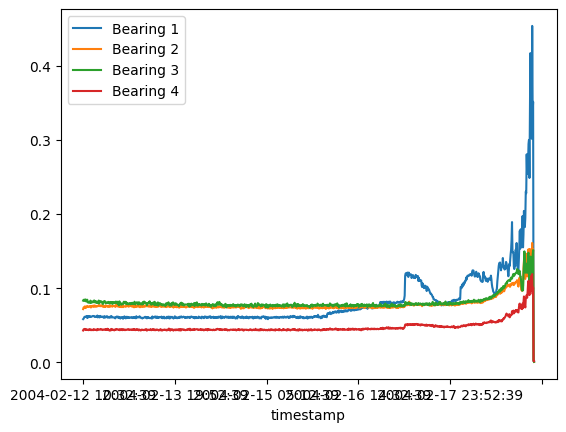

In [4]:
df_averaged_amplitude.plot()

In [5]:
df = df_averaged_amplitude

In [21]:
import random
all_colors = ["aliceblue"," antiquewhite"," aqua"," aquamarine"," azure","beige"," bisque"," black"," blanchedalmond"," blue",
          "blueviolet"," brown"," burlywood"," cadetblue",
          "chartreuse"," chocolate"," coral"," cornflowerblue",
          "cornsilk"," crimson"," cyan"," darkblue"," darkcyan",
          "darkgoldenrod"," darkgray"," darkgrey"," darkgreen",
          "darkkhaki"," darkmagenta"," darkolivegreen"," darkorange",
          "darkorchid"," darkred"," darksalmon"," darkseagreen",
          "darkslateblue"," darkslategray"," darkslategrey",
          "darkturquoise"," darkviolet"," deeppink"," deepskyblue",
          "dimgray"," dimgrey"," dodgerblue"," firebrick",
          "floralwhite"," forestgreen"," fuchsia"," gainsboro",
          "ghostwhite"," gold"," goldenrod"," gray"," grey"," green",
          "greenyellow"," honeydew"," hotpink"," indianred"," indigo",
          "ivory"," khaki"," lavender"," lavenderblush"," lawngreen",
          "lemonchiffon"," lightblue"," lightcoral"," lightcyan",
          "lightgoldenrodyellow"," lightgray"," lightgrey",
          "lightgreen"," lightpink"," lightsalmon"," lightseagreen",
          "lightskyblue"," lightslategray"," lightslategrey",
          "lightsteelblue"," lightyellow"," lime"," limegreen",
          "linen"," magenta"," maroon"," mediumaquamarine",
          "mediumblue"," mediumorchid"," mediumpurple",
          "mediumseagreen"," mediumslateblue"," mediumspringgreen",
          "mediumturquoise"," mediumvioletred"," midnightblue",
          "mintcream"," mistyrose"," moccasin"," navajowhite"," navy",
          "oldlace"," olive"," olivedrab"," orange"," orangered",
          "orchid"," palegoldenrod"," palegreen"," paleturquoise",
          "palevioletred"," papayawhip"," peachpuff"," peru"," pink",
          "plum"," powderblue"," purple"," red"," rosybrown",
          "royalblue"," rebeccapurple"," saddlebrown"," salmon",
          "sandybrown"," seagreen"," seashell"," sienna"," silver",
          "skyblue"," slateblue"," slategray"," slategrey"," snow",
          "springgreen"," steelblue"," tan"," teal"," thistle"," tomato",
          "turquoise"," violet"," wheat"," white"," whitesmoke",
          "yellow","yellowgreen"]

In [26]:
bg_color = random.choice(all_colors)
print(f"Using {bg_color}")

Using oldlace


In [34]:
animation_step = 100

#len(df.iloc[:1000,0])
len(df.index[:1000])

984

In [37]:
fig = go.Figure(
    data=[go.Scatter(x=df.index[:animation_step], y=df.iloc[:animation_step,0]),
          go.Scatter(x=df.index[:animation_step], y=df.iloc[:animation_step,1]) 
         ],
    layout=go.Layout(
        xaxis=dict(range=[0, 982], autorange=False),
        yaxis=dict(range=[0, 0.2], autorange=False),
        title="Start Title",
        plot_bgcolor = bg_color,
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
#     frames=[go.Frame(data=[go.Scatter(x=[1, 2], y=[1, 2])]),
#             go.Frame(data=[go.Scatter(x=[1, 4], y=[1, 4])],layout=go.Layout(plot_bgcolor = "lightpink") ),
#             go.Frame(data=[go.Scatter(x=[3, 4], y=[3, 4])],
#                      layout=go.Layout(title_text="End Title"))]
    
    
    
    
    frames=[go.Frame( data=[go.Scatter(x=np.arange(100*i), y=df.iloc[:100*i,0]),
                            go.Scatter(x=np.arange(100*i), y=df.iloc[:100*i,1])]  
                    ) for i in range(10) ] +
            [go.Frame( data=[go.Scatter(x=np.arange(982), y=df.iloc[:982,0]),
                            go.Scatter(x=np.arange(982), y=df.iloc[:982,1])]  
                    )]
    
    
)

fig.show()

ValueError: 
    Invalid value of type 'builtins.range' received for the 'range' property of layout.xaxis
        Received value: range(0, 984)

    The 'range' property is an info array that may be specified as:

    * a list or tuple of 2 elements where:
(0) The 'range[0]' property accepts values of any type
(1) The 'range[1]' property accepts values of any type